In [1]:
import time
import random
import math
import array
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pyvisa as visa
import os
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from CenterPiezoRS import center_piezo
from GrabLocation import grab_location
import config_constants as cc

<IPython.core.display.Javascript object>

In [2]:
name = '\StillErrorOverRange'
t = time.localtime()
current_time = time.strftime('_%Y%m%d_%H%M%S', t)
name = name+current_time
print(name)
folder = '.\Results'
os.mkdir(folder+name)
fulllist = name+'\FullList'
errorlist = name+'\ErrorList'
homes = name+'\Homes'
print(fulllist)

\StillErrorOverRange_20230412_151645
\StillErrorOverRange_20230412_151645\FullList


In [3]:
#generate random points
i = 1
points = 50
xpoints = []
ypoints = []

while i <= int(points):
    circle_x = 0 
    circle_y = 0    
    circle_r = cc.circle['circle_r']
    alpha = 2 * math.pi * random.random() #random angle
    r = circle_r * math.sqrt(random.random()) #random radius
    randx = r * math.cos(alpha) + circle_x #calculating coordinates
    randy = r * math.sin(alpha) + circle_y
    xpoints.append(randx)
    ypoints.append(randy)
    i += 1

#Generate grid points
xpoints = []
ypoints = []

X = int(cc.circle['circle_r']) # R is the radius
for x in range(-X,X+1):
    Y = int(((X)**2-x**2)**0.5) # bound for y given x
    for y in range(-Y,Y+1):
        xpoints.append(x)
        ypoints.append(y)


In [4]:
print(xpoints,ypoints)
print(len(xpoints))

[-0.5284462223008324, -0.03926638112879375, 0.9337190379065616, 0.5144372737255214, -1.1176552565123257, -0.3627037258954653, -1.8949536850417892, -0.5254825688504627, -1.214690885872853, 0.6016336536775309, 1.3816309624051903, -2.2255458149111433, -0.045968446134455505, 1.0146368115472293, -0.33624721222182147, -2.157709662625741, 1.2643302468801447, 0.4993367883393284, 0.01414576879721227, 0.49616479234830946, -0.10025860080272798, 0.15364995943344864, -1.8200681792865203, -1.7766128878873206, 0.3509671604711649, 0.10383343731013746, -0.8899509250223492, -0.6088419901670474, 2.2190480678855073, -0.246174824876427, 2.312232092635158, 0.36763418039357604, -0.7794665042995976, 1.5306680668489447, -0.5928854906331806, -1.3947560787706874, 2.13603065202609, 0.8704336567074463, 0.921403656534059, -0.9819379632198578, 0.9127881271021613, 0.9967671482233963, 1.0830142545252017, -1.2259339635706388, -0.0057578390584707905, 0.8914975663098964, 1.394913249169055, 1.0129032438432535, -1.43332519

In [5]:
n = 1 #start at trial 1
i = 1 #start at point 1
w = 0 #start at zero wins
x,y = grab_location('junk')

<IPython.core.display.Javascript object>

In [6]:
avg_stillx_errors = []
avg_stilly_errors = []


while i <= len(xpoints):
        def Average(lst):
            return sum(lst) / len(lst)
    
        print('## Starting point',i,".")

        #get to roughly the destination
        while np.sqrt((float(xpoints[i-1]+cc.circle['circle_x'])-float(x))**2 + (float(ypoints[i-1]+cc.circle['circle_y'])-float(y))**2) > 0.1:
            dy = (ypoints[i-1]+cc.circle['circle_y']) - y
            moveXY(0,dy)
            x,y = grab_location('junk')
            dx = (xpoints[i-1]+cc.circle['circle_x']) - x
            moveXY(dx,0)
            x,y = grab_location('junk')
            
        #save this as the home point
        dict = {'X (mm)': [x], 'Y (mm)': [y]} #add win point
        df = pd.DataFrame(dict)
        df.to_csv('.\Results\%s.csv' % homes, mode='a', index=False, header=False)
        
        errors = []
        finalx = []
        finaly = []
        
        #take 50 pics
        for index in range(0,50):
            x,y = grab_location('FullList')
            finalx.append(x)
            finaly.append(y)        
            #time.sleep(0.5)
            #print('## Done with pic #',index+1)
            
        avgx = np.var(finalx)
        avgy = np.var(finaly)
        
        avg_stillx_errors.append(avgx)
        avg_stilly_errors.append(avgy)
        
        print("## Point",i,"done.")
        i += 1

else:
    print('## AutoTest complete.') #end after all points attempted


## Starting point 1 .
0 -0.4221920967717274
negY 4.0 Vpp 0.2110960483858637 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.44573604393452015 0
posX 4.0 Vpp 0.276854685673615 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.11558542257739113
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

0.0844323329970198 0
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 1 done.
## Starting point 2 .
0 -3.4022342452008907
negY 4.0 Vpp 1.7011171226004453 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.4127128211417155 0
posX 4.0 Vpp 0.2563433671687674 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.5001807936628051
negY 4.0 Vpp 0.25009039683140255 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.05116535104894204 0
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.20257833089425148
negY 4.0 Vpp 0.10128916544712574 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.05016979299402813 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.12715718831612577
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

0.02237087167882379 0
posX 2.5 Vpp 0.3123550918573553 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 2 done.
## Starting point 3 .
0 1.4703140772368268
posY 4.0 Vpp 0.9821737322891294 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.8895030192298048 0
posX 4.0 Vpp 0.5524863473477049 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.6039092503998909
negY 4.0 Vpp 0.3019546251999454 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.01867378435906275 0
negX 2.5 Vpp 0.5003693558162581 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.17883333792430633
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.010506136043632708 0
negX 2.5 Vpp 0.28151489934707147 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 3 done.
## Starting point 4 .
0 -0.9346481318581716
negY 4.0 Vpp 0.4673240659290858 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.4269783756885399 0
negX 4.0 Vpp 0.2498410624274663 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.32000198317652995
negY 4.0 Vpp 0.16000099158826497 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.0803105137500637 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.2025901789773119
negY 4.0 Vpp 0.10129508948865595 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.010871197954164913 0
negX 2.5 Vpp 0.2912968369283203 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.11177787734157008
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.002577664628969245 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 4 done.
## Starting point 5 .
0 2.6124639848771434
posY 4.0 Vpp 1.7451329224296213 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.7342440931822463 0
negX 4.0 Vpp 1.0147712657590675 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.6305455823835988
negY 4.0 Vpp 0.3152727911917994 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.04579080033556693 0
negX 2.5 Vpp 1.226977500953026 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.12354828318926359
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.0387629835631067 0
negX 2.5 Vpp 1.038665154424081 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 5 done.
## Starting point 6 .
0 -0.9420559580312577
negY 4.0 Vpp 0.4710279790156289 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.7060948580889086 0
posX 4.0 Vpp 0.4385682348378314 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.2620812113271569
negY 4.0 Vpp 0.13104060566357845 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.04779041107612869 0
negX 2.5 Vpp 1.2805576386958386 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1267239267812581
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.03267963226753601 0
negX 2.5 Vpp 0.8756600286049305 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 6 done.
## Starting point 7 .
0 0.5908755235206602
posY 4.0 Vpp 0.39470642853751514 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.591638957258585 0
negX 4.0 Vpp 0.9313276519944909 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.2642190046775834
negY 4.0 Vpp 0.1321095023387917 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.035041416886921084 0
posX 2.5 Vpp 0.48926859657806593 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.12386065201645025
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.012340556379680123 0
negX 2.5 Vpp 0.3306687132818897 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 7 done.
## Starting point 8 .
0 -1.387248758920812
negY 4.0 Vpp 0.693624379460406 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

1.3144074763155533 0
posX 4.0 Vpp 0.8164021592022069 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.3417703195897577
negY 4.0 Vpp 0.17088515979487884 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.2061884556912812 0
negX 4.0 Vpp 0.12064859900016453 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.22734771216788197
negY 4.0 Vpp 0.11367385608394098 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.07269999133581351 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.1282304331151476
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

0.0005639399386012656 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 8 done.
## Starting point 9 .
0 0.40764908285900603
posY 4.0 Vpp 0.2723106765925224 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.7201041854333994 0
negX 4.0 Vpp 0.4213599680710353 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 9 done.
## Starting point 10 .
0 -1.446100428392885
negY 4.0 Vpp 0.7230502141964426 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

1.781903413809367 0
posX 4.0 Vpp 1.1067723067138926 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.35317821769952573
negY 4.0 Vpp 0.17658910884976287 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.28062977405684286 0
negX 4.0 Vpp 0.16420700646977346 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.2429956462883922
negY 4.0 Vpp 0.1214978231441961 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.11873364063399094 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.18128681450128248
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.04572834583418661 0
negX 2.5 Vpp 1.2253040148495877 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 10 done.
## Starting point 11 .
0 0.24896777931806113
posY 4.0 Vpp 0.16631114182903214 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.7497734184598794 0
posX 4.0 Vpp 0.4656977754409189 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 11 done.
## Starting point 12 .
0 1.2793577266704155
posY 4.0 Vpp 0.854614379873357 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-3.611839088836925 0
negX 4.0 Vpp 2.113422521262098 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.5912958072651318
negY 4.0 Vpp 0.2956479036325659 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.14010103646876004 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.12745417823681215
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.08178766671778348 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 12 done.
## Starting point 13 .
0 0.0778683755879257
posY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

2.1721682878743334 0
posX 4.0 Vpp 1.349172849611387 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.016674699973597384
negY 2.5 Vpp 0.9668734763769792 s
Configuring C2
Small move done.


<IPython.core.display.Javascript object>

-0.33939787423504164 0
negX 4.0 Vpp 0.198594426117637 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.022958650779262513
negY 2.5 Vpp 1.3312449715448516 s
Configuring C2
Small move done.


<IPython.core.display.Javascript object>

-0.1469517377604319 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 13 done.
## Starting point 14 .
0 -2.3799518359821334
negY 4.0 Vpp 1.1899759179910667 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.9948470624017212 0
posX 4.0 Vpp 0.6179174300631808 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.44683644901924247
negY 4.0 Vpp 0.22341822450962123 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.09871372861390171 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.17564008366279715
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.02558941525941094 0
negX 2.5 Vpp 0.6856756500378066 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 14 done.
## Starting point 15 .
0 0.9777983039673579
posY 4.0 Vpp 0.653171879737714 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.3949876907374463 0
negX 4.0 Vpp 0.8162596200921277 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.48697220384514317
negY 4.0 Vpp 0.24348610192257159 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.027947795102399198 0
posX 2.5 Vpp 0.390223332901413 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.17705017625725183
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.019572651674945263 0
negX 2.5 Vpp 0.5244547608506234 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 15 done.
## Starting point 16 .
0 -0.5794329582591438
negY 4.0 Vpp 0.2897164791295719 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.8417000038122637 0
negX 4.0 Vpp 1.0776477494512953 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.41496991504625313
negY 4.0 Vpp 0.20748495752312657 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.12052347488160109 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.1823641716380493
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.07691347427124917 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 16 done.
## Starting point 17 .
0 -0.1514454107756631
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

3.393346116020769 0
posX 4.0 Vpp 2.107668395043956 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.1594597082610143
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.5166960745309872 0
negX 4.0 Vpp 0.30233825309010365 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 17 done.
## Starting point 18 .
0 0.9261296036429876
posY 4.0 Vpp 0.6186570498617151 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.863124164419462 0
negX 4.0 Vpp 0.505046322071072 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.47381699059529403
negY 4.0 Vpp 0.23690849529764701 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.017082134408664018 0
posX 2.5 Vpp 0.23851067311734175 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1702155349068164
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.024751743154812544 0
negX 2.5 Vpp 0.6632299880710757 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 18 done.
## Starting point 19 .
0 0.49003929571249394
posY 4.0 Vpp 0.3273475589261816 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.5056329177262242 0
negX 4.0 Vpp 0.29586478509433833 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.18547339960000642
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.15051130517739608 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 19 done.
## Starting point 20 .
0 -1.824501022506258
negY 4.0 Vpp 0.912250511253129 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.4020170567526069 0
posX 4.0 Vpp 0.2497000352500664 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.3177604524378985
negY 4.0 Vpp 0.15888022621894926 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.06415656786100676 0
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.19459341447403133
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.026877749155595154 0
negX 2.5 Vpp 0.7201969227115529 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 20 done.
## Starting point 21 .
0 4.29562083986535
posY 4.0 Vpp 2.8694861989748497 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.6584013162568301 0
negX 4.0 Vpp 0.3852553050069222 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 0.04793788698449042
posY 2.5 Vpp 0.7614022710370143 s
Configuring C2
Small move done.


<IPython.core.display.Javascript object>

-0.138271921725579 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 21 done.
## Starting point 22 .
0 -1.9407443830222117
negY 4.0 Vpp 0.9703721915111059 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.17217502962387776 0
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.3416660138815857
negY 4.0 Vpp 0.17083300694079284 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.08827991117201961 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.2092521497458435
negY 4.0 Vpp 0.10462607487292175 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.014713855874168402 0
negX 2.5 Vpp 0.394261947324984 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.10400655953588256
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.0030065499659652772 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 22 done.
## Starting point 23 .
0 -0.7265375295733012
negY 4.0 Vpp 0.3632687647866506 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.9842972442279265 0
negX 4.0 Vpp 1.1610867432580025 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.4057710805986918
negY 4.0 Vpp 0.2028855402993459 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.02767454830507532 0
negX 2.5 Vpp 0.7415473822367449 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.11562444363580049
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.021595446742574964 0
negX 2.5 Vpp 0.578656129222266 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 23 done.
## Starting point 24 .
0 1.5387628783268976
posY 4.0 Vpp 1.0278977143132249 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.11088017609532841 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.5523141632990782
negY 4.0 Vpp 0.2761570816495391 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.08127888825353224 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.236042953582281
negY 4.0 Vpp 0.1180214767911405 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.023984042672477557 0
negX 2.5 Vpp 0.6426592355969335 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.11009614572095394
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.011097995309196307 0
negX 2.5 Vpp 0.2973739364736417 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 24 done.
## Starting point 25 .
0 -1.8216234109372529
negY 4.0 Vpp 0.9108117054686264 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

2.0582510807592502 0
posX 4.0 Vpp 1.2784168203473603 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.31391009306615913
negY 4.0 Vpp 0.15695504653307957 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.19764834856203883 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.21316546415990878
negY 4.0 Vpp 0.10658273207995439 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.038776288278782545 0
posX 2.5 Vpp 0.5414170382404712 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1830263040036595
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

0.0004969456274146467 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 25 done.
## Starting point 26 .
0 -0.11189187122500144
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.24860630573185283 0
negX 4.0 Vpp 0.14546887403853295 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.055139475595119336
negY 2.5 Vpp 3.1972327261463143 s
Configuring C2
Small move done.


<IPython.core.display.Javascript object>

-0.0880445534125176 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 26 done.
## Starting point 27 .
0 0.7044969768298
posY 4.0 Vpp 0.4706058629457581 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.0438505527078945 0
negX 4.0 Vpp 0.610796110420067 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.24912545969363897
negY 4.0 Vpp 0.12456272984681949 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.01653038296104903 0
posX 2.5 Vpp 0.23080679923274264 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1095418720471546
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.02889579501746553 0
negX 2.5 Vpp 0.7742710347659575 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 27 done.
## Starting point 28 .
0 1.2864843250423927
posY 4.0 Vpp 0.8593749666281848 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.17319969684467296 0
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.385545551666592
negY 4.0 Vpp 0.192772775833296 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.0753007456602095 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.20281888235506962
negY 4.0 Vpp 0.10140944117753481 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.0073777720273984215 0
negX 2.5 Vpp 0.19768949698280872 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.10668622244295989
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

0.003155370062446039 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 28 done.
## Starting point 29 .
0 -2.6082855805379186
negY 4.0 Vpp 1.3041427902689593 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

2.8031641872702746 0
posX 4.0 Vpp 1.7410957684908537 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.4700039490681913
negY 4.0 Vpp 0.23500197453409566 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.31982432286156026 0
negX 4.0 Vpp 0.1871412070576713 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.179468212984208
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.11229487339867106 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 29 done.
## Starting point 30 .
0 0.3095686832501965
posY 4.0 Vpp 0.20679270758196155 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-2.500215214891073 0
negX 4.0 Vpp 1.4629696985904463 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.337092312233203
negY 4.0 Vpp 0.1685461561166015 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.020342570143105476 0
posX 2.5 Vpp 0.2840347688230309 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1994999965593749
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.03226477543794992 0
negX 2.5 Vpp 0.8645438220243816 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 30 done.
## Starting point 31 .
0 0.7552025850746542
posY 4.0 Vpp 0.5044773447392479 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

2.4738037326498077 0
posX 4.0 Vpp 1.5365240575464643 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.3832179013755397
negY 4.0 Vpp 0.19160895068776984 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.2746436855630847 0
negX 4.0 Vpp 0.1607043215699735 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.2349047605063994
negY 4.0 Vpp 0.1174523802531997 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.10493924830722534 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.11658200660014906
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.023101403458589687 0
negX 2.5 Vpp 0.6190086671647826 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 31 done.
## Starting point 32 .
0 -1.5684178501712278
negY 4.0 Vpp 0.7842089250856139 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.924428060207008 0
negX 4.0 Vpp 1.126055038155066 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.5308541447268933
negY 4.0 Vpp 0.26542707236344665 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.03126766428029626 0
posX 2.5 Vpp 0.4365772728329553 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.23653499189486205
negY 4.0 Vpp 0.11826749594743102 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.005806615504861057 0
negX 2.5 Vpp 0.1555899117058161 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.16072703901400232
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.004654195460915389 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 32 done.
## Starting point 33 .
0 3.5498289709130155
posY 4.0 Vpp 2.371295237750845 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.3092450382351437 0
negX 4.0 Vpp 0.766088378136421 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.49087728213874193
negY 4.0 Vpp 0.24543864106937097 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.028473782741979647 0
negX 2.5 Vpp 0.7629630959801621 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.14705098819342943
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.025185895168737815 0
negX 2.5 Vpp 0.6748632145964045 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 33 done.
## Starting point 34 .
0 -2.694941444246048
negY 4.0 Vpp 1.347470722123024 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

2.2734633854524606 0
posX 4.0 Vpp 1.4120890592872426 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.47288791641401673
negY 4.0 Vpp 0.23644395820700836 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.34783673966961004 0
negX 4.0 Vpp 0.20353232280258046 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.20702449783491517
negY 4.0 Vpp 0.10351224891745758 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.016644995559882858 0
posX 2.5 Vpp 0.23240708684561376 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1615891645829617
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.01467633927898504 0
negX 2.5 Vpp 0.39325667950120685 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 34 done.
## Starting point 35 .
0 2.2241779017963825
posY 4.0 Vpp 1.485756781427109 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-2.1576425096761476 0
negX 4.0 Vpp 1.2625175597870963 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.625854141660648
negY 4.0 Vpp 0.312927070830324 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.02567734506017949 0
posX 2.5 Vpp 0.3585219919042096 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.14474681133838274
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.02183051321618734 0
negX 2.5 Vpp 0.5849548021486426 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 35 done.
## Starting point 36 .
0 -0.856102592675045
negY 4.0 Vpp 0.4280512963375225 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.8295398769884592 0
negX 4.0 Vpp 0.4853948958387707 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.21104262563403076
negY 4.0 Vpp 0.10552131281701538 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.10336990933709345 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.1449083635490691
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.046335989049007154 0
negX 2.5 Vpp 1.241585987379613 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 36 done.
## Starting point 37 .
0 -1.4251516752631872
negY 4.0 Vpp 0.7125758376315936 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

3.4473398408688656 0
posX 4.0 Vpp 2.141204870104885 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.37217163375927953
negY 4.0 Vpp 0.18608581687963976 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.458498934765899 0
negX 4.0 Vpp 0.26828492379514274 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.26368049911572555
negY 4.0 Vpp 0.13184024955786278 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.08335931684597853 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.1388849668891634
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.013677386303985628 0
negX 2.5 Vpp 0.36648945080347345 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 37 done.
## Starting point 38 .
0 0.6824673058750665
posY 4.0 Vpp 0.45588998388447993 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.3050029888003642 0
negX 4.0 Vpp 0.7636061959042506 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.2950252173182939
negY 4.0 Vpp 0.14751260865914695 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.01040841482575594 0
negX 2.5 Vpp 0.27889643155830496 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1602985022304022
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.008045209869701253 0
negX 2.5 Vpp 0.2155736835396906 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 38 done.
## Starting point 39 .
0 1.874592523408749
posY 4.0 Vpp 1.2522328145683026 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.009639068075316004 0
negX 2.5 Vpp 0.2582815668627011 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.5130913449994541
negY 4.0 Vpp 0.25654567249972704 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.005178161092892708 0
negX 2.5 Vpp 0.13875029723721083 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1872334195844143
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.0028115229092993133 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 39 done.
## Starting point 40 .
0 -2.112813378192598
negY 4.0 Vpp 1.056406689096299 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-1.891403997155404 0
negX 4.0 Vpp 1.106731420219663 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.43870983205001934
negY 4.0 Vpp 0.21935491602500967 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.04782024600865853 0
posX 2.5 Vpp 0.6676940241365334 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.1510454185978709
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.0062576653682953065 0
negX 2.5 Vpp 0.16767592090823438 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 40 done.
## Starting point 41 .
0 -1.5456373726119885
negY 4.0 Vpp 0.7728186863059943 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

1.8572741195338018 0
posX 4.0 Vpp 1.1535864096483242 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.47041344988249634
negY 4.0 Vpp 0.23520672494124817 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.21798833163807352 0
negX 4.0 Vpp 0.1275531489982876 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.20759244310759328
negY 4.0 Vpp 0.10379622155379664 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.0665189102513537 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.13808160173796402
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

0.0004187270777471497 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 41 done.
## Starting point 42 .
0 2.3260680569782632
posY 4.0 Vpp 1.553819677340189 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.04378981283617378 0
negX 2.5 Vpp 1.1733604725662856 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.9865753756389246
negY 4.0 Vpp 0.4932876878194623 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.011887118134023211 0
negX 2.5 Vpp 0.318518706699443 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.26303297146412064
negY 4.0 Vpp 0.13151648573206032 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.008053067412848947 0
posX 2.5 Vpp 0.11244160029110509 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.11990171536060501
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.027231356415274632 0
negX 2.5 Vpp 0.7296719296697383 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 42 done.
## Starting point 43 .
0 1.6948252883530266
posY 4.0 Vpp 1.1321478212111065 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.05455827613164743 0
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 43 done.
## Starting point 44 .
0 -1.956278113247345
negY 4.0 Vpp 0.9781390566236725 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-2.334109485421223 0
negX 4.0 Vpp 1.3657750060978484 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.4530875004543766
negY 4.0 Vpp 0.2265437502271883 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.03402100774283845 0
posX 2.5 Vpp 0.4750210519804307 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.15313785445828287
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.032817065987629235 0
negX 2.5 Vpp 0.8793426041701295 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 44 done.
## Starting point 45 .
0 0.5413850139254688
posY 4.0 Vpp 0.3616466358887567 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

1.1659860726846922 0
posX 4.0 Vpp 0.7242149519780696 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.09743448985871161
negY 2.5 Vpp 5.649686295877978 s
Configuring C2
Small move done.


<IPython.core.display.Javascript object>

-0.15553301606042425 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.08841425670441438
negY 2.5 Vpp 5.1266529458665415 s
Configuring C2
Small move done.


<IPython.core.display.Javascript object>

-0.06498621735436849 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 45 done.
## Starting point 46 .
0 0.554308520051519
posY 4.0 Vpp 0.3702795725127047 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.8776907883557961 0
posX 4.0 Vpp 0.5451495579849664 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 46 done.
## Starting point 47 .
0 0.4557210382037731
posY 4.0 Vpp 0.3044228712116052 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.4598284713370262 0
posX 4.0 Vpp 0.28560774617206597 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.10232148804134411
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

0.05217504421300134 0
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 47 done.
## Starting point 48 .
0 -2.4205095815584006
negY 4.0 Vpp 1.2102547907792003 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.42739469927198215 0
negX 4.0 Vpp 0.2500846689713178 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.2717897939607443
negY 4.0 Vpp 0.13589489698037216 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.08511564653760573 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.15264649867265767
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.02297651689893243 0
negX 2.5 Vpp 0.6156622963272356 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 48 done.
## Starting point 49 .
0 1.404750728088258
posY 4.0 Vpp 0.9383772398719158 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-2.5063753625754686 0
negX 4.0 Vpp 1.466574232051181 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

0 -0.6305867200318591
negY 4.0 Vpp 0.31529336001592956 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

0.04490408688742065 0
posX 2.5 Vpp 0.6269769182828909 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.14878473333752318
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.011688091457306982 0
negX 2.5 Vpp 0.3131857303672825 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 49 done.
## Starting point 50 .
0 -2.3950966561685085
negY 4.0 Vpp 1.1975483280842543 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.17403603327010053 0
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

0 -0.4761387551675327
negY 4.0 Vpp 0.23806937758376634 s
Configuring C2
Move done.


<IPython.core.display.Javascript object>

-0.01932564508650536 0
negX 2.5 Vpp 0.5178361491560922 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

0 -0.18764006742339134
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

-0.02591973077986509 0
negX 2.5 Vpp 0.6945265482278964 s
Configuring C1
Small move done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Point 50 done.
## AutoTest complete.


In [7]:
print(avg_stillx_errors)
print(avg_stilly_errors)

[4.825641426723672e-07, 3.9260580326658736e-07, 2.2017771634280265e-07, 6.16133055940592e-07, 2.1763549820765577e-07, 2.970810220576436e-07, 6.061782257748313e-07, 2.8816518170078843e-07, 4.799985180725467e-07, 4.43376405222827e-07, 6.854019943276951e-07, 1.5022569292341006e-06, 1.4327090830195577e-06, 8.021430519875402e-07, 1.556745093315682e-06, 2.04872263188077e-07, 2.8664543861518933e-06, 1.2495556432404506e-06, 7.174015394411829e-07, 3.981499895451709e-07, 1.510008453041558e-07, 8.384259895538027e-07, 1.0128416137886825e-06, 3.660411711316434e-07, 1.1828642149920544e-06, 3.1546848476863514e-07, 4.7659963747722516e-07, 3.738407730124493e-07, 3.7043236638412766e-07, 4.969302579409717e-07, 4.336673193609168e-07, 4.320743266143139e-07, 4.415611574077603e-07, 9.514223905861226e-07, 1.2362906737836021e-06, 6.92421045620031e-07, 5.280479032080404e-07, 6.087756890337234e-07, 8.891969351681935e-07, 6.009717579000054e-07, 4.338894817046769e-07, 1.3607377331358136e-06, 3.919336191820773e-05,

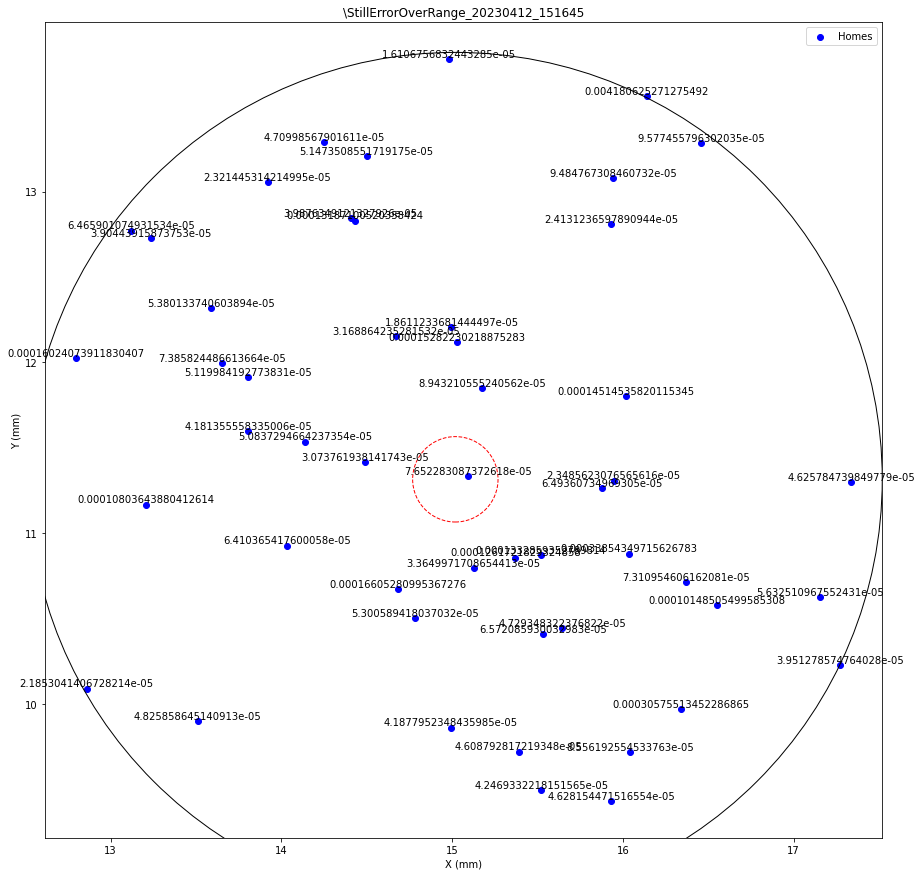

In [8]:
#plot
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
headers = ['X (mm)', 'Y (mm)']
data = pd.read_csv('.\Results\%s.csv' %homes, names=headers) #select your file
pts = data.iloc[::,:]
plt.scatter(pts['X (mm)'], pts['Y (mm)'],color='blue',label="Homes")

circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

pixx_errors = [x / cc.conversion for x in avg_stillx_errors]
    
for (xi, yi, i) in zip(pts['X (mm)'], pts['Y (mm)'],pixx_errors):
    plt.text(xi, yi, i, va='bottom', ha='center')


plt.title(name)
plt.axis('equal')
plt.xlim()
plt.ylim()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='best')
plt.savefig(folder + '\CoordsOnly')
plt.show()

In [9]:
dist_center = (((pts['X (mm)'])-cc.circle['circle_x'])**2 + ((pts['Y (mm)'])-cc.circle['circle_y'])**2)**0.5
print(dist_center)

0     1.961008
1     1.454443
2     0.926698
3     1.041050
4     2.060274
5     0.909125
6     2.391264
7     0.536382
8     1.353032
9     1.071068
10    1.481445
11    2.333660
12    0.801375
13    1.896722
14    0.726542
15    2.482837
16    1.885071
17    0.669749
18    0.074754
19    1.888971
20    2.458857
21    0.558500
22    1.818650
23    2.272786
24    0.577541
25    0.531469
26    0.908265
27    1.646915
28    2.502827
29    0.843573
30    2.316883
31    1.637317
32    2.120990
33    1.698374
34    1.624694
35    1.527806
36    2.242782
37    0.861171
38    1.989933
39    1.057202
40    2.092139
41    1.111472
42    2.507998
43    1.245088
44    0.892471
45    1.749371
46    2.438783
47    1.103872
48    1.748199
49    2.068473
dtype: float64


In [10]:
umx_errors = [x *1000 for x in avg_stillx_errors]
umy_errors = [y *1000 for y in avg_stilly_errors]

Text(0, 0.5, 'Variance in measurement (um)')

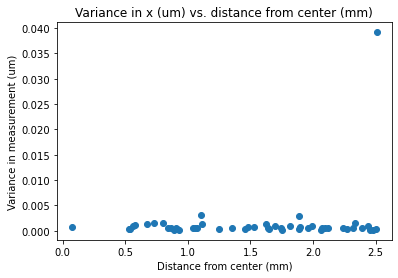

In [11]:
plt.scatter(dist_center,umx_errors)
plt.title('Variance in x (um) vs. distance from center (mm)')
plt.xlabel('Distance from center (mm)')
plt.ylabel('Variance in measurement (um)')

Text(0, 0.5, 'Variance in measurement (um)')

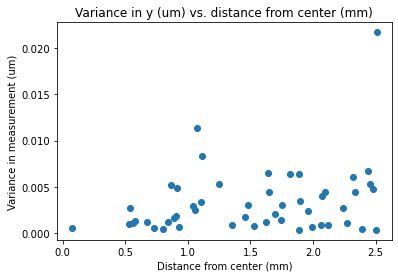

In [12]:
plt.scatter(dist_center,umy_errors)
plt.title('Variance in y (um) vs. distance from center (mm)')
plt.xlabel('Distance from center (mm)')
plt.ylabel('Variance in measurement (um)')